In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import json
import seaborn as sns

In [3]:
#Rating_path = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Musical_Instruments.csv"
Review_path = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Grocery_and_Gourmet_Food.csv"

In [4]:
!pip install -q scikit-surprise

In [5]:
from surprise import SVD, accuracy
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader, Dataset
print('import compleetd')

import compleetd


In [6]:
df = pd.read_csv(Review_path,index_col=None)

In [7]:
df.head()

,A1ZQZ8RJS1XVTX,0657745316,5.0,1381449600
0,A31W38VGZAUUM4,0700026444,5.0,1354752000
1,A3I0AV0UJX5OH0,1403796890,1.0,1385942400
2,A3QAAOLIXKV383,1403796890,3.0,1307836800
3,AB1A5EGHHVA9M,141278509X,5.0,1332547200
4,A3DTB6RVENLQ9Q,1453060375,1.0,1362268800


In [8]:
df.columns = ['userid','product_id','rating','timetsamp']

In [9]:
df.head()

,userid,product_id,rating,timetsamp
0,A31W38VGZAUUM4,0700026444,5.0,1354752000
1,A3I0AV0UJX5OH0,1403796890,1.0,1385942400
2,A3QAAOLIXKV383,1403796890,3.0,1307836800
3,AB1A5EGHHVA9M,141278509X,5.0,1332547200
4,A3DTB6RVENLQ9Q,1453060375,1.0,1362268800


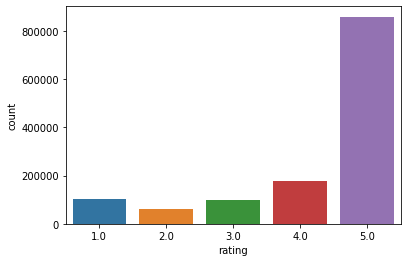

In [10]:
sns.countplot('rating',data=df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297155 entries, 0 to 1297154
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   userid      1297155 non-null  object 
 1   product_id  1297155 non-null  object 
 2   rating      1297155 non-null  float64
 3   timetsamp   1297155 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 39.6+ MB


In [12]:
df.describe()

,rating,timetsamp
count,1.297155e+06,1.297155e+06
mean,4.254562e+00,1.350578e+09
std,1.253953e+00,5.373980e+07
min,1.000000e+00,9.657792e+08
25%,4.000000e+00,1.329869e+09
50%,5.000000e+00,1.367280e+09
75%,5.000000e+00,1.389053e+09
max,5.000000e+00,1.406074e+09


Lets compare the average rating for each product vs the number of people who rated for the product. This will help identify products which have a very high or low rating because of very few ratings received

In [13]:
ratings=pd.DataFrame(df.groupby('product_id')['rating'].mean())
ratings.head()

,rating
product_id,
0700026444,5.0
1403796890,2.0
141278509X,5.0
1453060375,1.0
1453060464,3.0


In [14]:
ratings['Number_Of_Ratings']=pd.DataFrame(df.groupby('product_id')['rating'].count())
ratings.head()

,rating,Number_Of_Ratings
product_id,,
0700026444,5.0,1
1403796890,2.0,2
141278509X,5.0,1
1453060375,1.0,1
1453060464,3.0,1


In [15]:
ratings.describe()

,rating,Number_Of_Ratings
count,166048.000000,166048.000000
mean,4.191747,7.811928
std,1.046672,41.111044
min,1.000000,1.000000
25%,3.857143,1.000000
50%,4.555556,2.000000
75%,5.000000,5.000000
max,5.000000,6340.000000


In [16]:

user_count=df.userid.value_counts()
user_count.sort_values(ascending=True).head()
user_count

AY12DBB0U420B     518
A1LACH6MLQWZ      490
A3D6OI36USYOU1    440
A2NYK9KWFMJV4Y    432
A3OXHLG6DIBRW8    378
                 ... 
A33YCINWICQ8EC      1
A3PE1NBGQNGCTN      1
AKFFACZZ7LU94       1
A1UF3YFIJ0PVEG      1
A1QGJECP83IHWY      1
Name: userid, Length: 768438, dtype: int64

In [17]:

df_new=df[df['userid'].isin(user_count[user_count >= 5].index)]
df_new.shape

(329057, 4)

In [18]:
df_new.head()

,userid,product_id,rating,timetsamp
5,A3LZA698SQPCXE,1453060464,3.0,1374019200
12,A21SKLDXVEJ89E,1837994021,5.0,1398211200
37,A3KP2Q52VKOTV2,3301261876,5.0,1391126400
44,A2LE2MFI4QTQY4,5901002482,5.0,1363132800
57,A1VEELTKS8NLZB,616719923X,4.0,1370044800


In [19]:
user_count=df_new.userid.value_counts()
user_count.sort_values(ascending=True).head()
user_count

AY12DBB0U420B     518
A1LACH6MLQWZ      490
A3D6OI36USYOU1    440
A2NYK9KWFMJV4Y    432
A3OXHLG6DIBRW8    378
                 ... 
AP95KPITSWFAL       5
A19SG8AQ2L8U4B      5
A1VU16C5MHGWI9      5
A3RCY0OBPZ5XWF      5
A2S3ZQY7LC95HD      5
Name: userid, Length: 32228, dtype: int64

In [20]:
reader = Reader()
data = Dataset.load_from_df(df_new[['userid', 'product_id', 'rating']], reader)

In [21]:
from surprise.model_selection import train_test_split, GridSearchCV
trainset, testset = train_test_split(data, test_size=0.25)

In [22]:
Recommendation_algo = SVD()
Recommendation_algo.fit(trainset)

In [23]:
y_hat = Recommendation_algo.test(testset)

In [24]:
accuracy.rmse(y_hat)

RMSE: 1.0630


1.0629835168750361

In [25]:
y_hat

[Prediction(uid='A2A5C9IQ06CG9N', iid='B000BB6RPK', r_ui=5.0, est=4.712310578448636, details={'was_impossible': False}),
 Prediction(uid='A261I99RHT7ONU', iid='B003Y390HO', r_ui=5.0, est=4.545468950068546, details={'was_impossible': False}),
 Prediction(uid='A2700AZT2NLBQS', iid='B005XEOTJQ', r_ui=4.0, est=4.4633014680907745, details={'was_impossible': False}),
 Prediction(uid='A1KD66IMLIQWL4', iid='B000FMMTHU', r_ui=5.0, est=4.782403638131252, details={'was_impossible': False}),
 Prediction(uid='A100WO06OQR8BQ', iid='B007NWHPJW', r_ui=5.0, est=3.9881077923024257, details={'was_impossible': False}),
 Prediction(uid='A2ZX7WLWYETI0T', iid='B000WKXVEU', r_ui=4.0, est=4.41627027498834, details={'was_impossible': False}),
 Prediction(uid='A2SV2E8E9OGBBT', iid='B00B3PJHIM', r_ui=4.0, est=4.1432465988435565, details={'was_impossible': False}),
 Prediction(uid='A3U5W4MQ7HA99U', iid='B0001BGU0C', r_ui=5.0, est=4.556557502799815, details={'was_impossible': False}),
 Prediction(uid='A2IXW9H68Q5T2

In [38]:
from collections import defaultdict
def get_top_n(y_hat, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, r_ui, est, _ in y_hat:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user and retrieve the k highest ones.

    for uid, user_ratings in top_n.items():
            user_ratings.sort(key=lambda x: x[1], reverse=True)
            top_n[uid] = user_ratings[:n]
    return top_n

In [41]:
  top_Recommend = get_top_n(y_hat,n=5)


In [44]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A2A5C9IQ06CG9N ['B00014JNI0', 'B000WR8TK4', 'B000BB6RPK', 'B00BVUC24U', 'B000WV153I']
A261I99RHT7ONU ['B003Y390HO']
A2700AZT2NLBQS ['B005XEOTJQ', 'B002HFRAF4', 'B005VRNO3M']
A1KD66IMLIQWL4 ['B000FMMTHU', 'B007RGZQBI']
A100WO06OQR8BQ ['B000H7LVKY', 'B0029XDZIK', 'B004VLSVL4', 'B003EXVM66', 'B00AQIT90S']
A2ZX7WLWYETI0T ['B000LQNCEE', 'B000WKXVEU']
A2SV2E8E9OGBBT ['B000KGOVHC', 'B00ESXJ862', 'B00B3PJHIM']
A3U5W4MQ7HA99U ['B0001BGU0C', 'B0001AVTD6', 'B0001AVRRO']
A2IXW9H68Q5T2O ['B004DND9EY']
A33GLXE4JVDRGZ ['B001E5E05Q', 'B001LCMQE4', 'B001E5E09C']
A3F9TZZ9QQMCM8 ['B005HI553W', 'B008YPDEGA', 'B001EQ4SL6']
A2KBFB6A2D7PNO ['B0025UCHT0', 'B005OVPK9G', 'B005VUGUCG', 'B000V6FTTU', 'B000E3XCEE']
A23TT78NE3WT08 ['B002EMFUQ6', 'B004VDH4LU', 'B0060JMVM0', 'B002EMFTH6']
A27X9MZAK8ZK08 ['B001QK44PK']
A20PRH0N6OX7B8 ['B000FAIR96', 'B00DDT116M']
AAKUZQRGJWAY7 ['B004H6MV28', 'B0099PC08M', 'B009AE9E7M']
A2WQY1B8ZS7QRZ ['B001EQ55RW', 'B001LG945O']
A2I01UB3D5DU3R ['B005K4Q1YA']
AKJTDGWC0QHND ['B0018QLG9Y'

### Lets take the products which has atleast 5 ratings

We could use the code below to estimate user AIQDUKFB4X38M's rating on a specific Product in the dataset.

In [52]:
Recommendation_algo.predict("AIQDUKFB4X38M ","B001EQ55RW").est

4.141551088614657

In [148]:
#df_rating = pd.read_csv(Rating_path,index_col=None)
#print('Reading Ratings completed')


In [387]:
#import urllib.request
#testfile = urllib.request.URLopener()
#testfile.retrieve(Review_path,"instrument.gz")

In [373]:
#df_review = pd.read_json('instrument.gz', compression='gzip',lines=True)
#print('completed')

In [386]:
#df_review.head()

In [152]:
#df_rating.head()

In [380]:
#sns.countplot('overall',data=df_review)

In [381]:
#df_Review_seg = df_review[df_review["reviewerID"],df_review["asin"],df_review["overall"]]

import compleetd


In [155]:
#Count_product = df_review.groupby(df_review['asin'],as_index=False).count()

In [359]:
#Count_product.head()

In [358]:
#df_merge = pd.merge(df_review, Count_product, how='right', on=['asin'])

In [360]:
#df_merge.head()

In [354]:
#df_merge["totalReviewers"] = df_merge["reviewerID_y"]
#df_merge["overallScore"] = df_merge["overall_x"]
#df_merge["summaryReview"] = df_merge["summary_x"]

#df_rename = df_merge[['asin_x','summaryReview','overallScore',"totalReviewers"]]

In [361]:
#df_rename.head()

In [362]:
#df_rename.tail(10)

In [162]:
#df_rename[df_rename["overallScore"] == 5 ]

In [163]:
#df_rename = df_rename.sort_values(by='totalReviewers', ascending=False)

In [363]:
#df_rename.head()

### Reviews text cleaning

In [165]:
#import re
#import string


In [166]:
#regEx = re.compile('[^a-z]+')

In [167]:
#def Review_clean(Review_summary):
#    Review_summary = Review_summary.lower()
#    Review_summary = regEx.sub(' ', Review_summary).strip()
#    return Review_summary

In [168]:
#df_rename["summaryReview"] = df_rename["summaryReview"].apply(Review_clean)
##for i in  range(len(product_summary)):
#    Review_clean(df_rename["summaryReview"][i])

In [169]:
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [343]:
#reviews = df_rename["summaryReview"] 
#countVector = CountVectorizer(max_features = 300, stop_words='english') 
#transformedReviews = countVector.fit_transform(reviews) #

#df_Reviewstrans = pd.DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
#df_Reviewstrans = dfReviews.astype(int)

In [344]:
#df_Reviewstrans

## Grouping all the summary Reviews by ASIN


In [172]:
#df_mean = df_rename.groupby("asin", as_index=False).mean()

In [345]:
#df_mean

In [174]:
#asin_summary = df_rename.groupby("asin")["summaryReview"].apply(list)
#product_summary = pd.DataFrame(asin_summary)

In [346]:
#product_summary.head()

## Grouping the ASIN, Summary Review, Rating

In [176]:
#df_mean_rating = df_mean.groupby("asin")["overallScore"].apply(list)

In [351]:
#df_mean_rating

In [178]:
#product_summary["overallrating"] = pd.DataFrame(df_mean_rating)

In [350]:
#product_summary.head()

In [349]:
#product_summary.reset_index()

#### as reading from data frame directly it was taking summary as List,so writing back to file & reading back

In [180]:
#product_summary.to_csv('product_summary.csv')

In [181]:
#product_summary1 = pd.read_csv('product_summary.csv')

In [348]:
#product_summary = product_summary.reset_index()
#product_summary1.head()

In [308]:
#reviews1 = product_summary1["summaryReview"] 
#countVector = CountVectorizer(max_features = 10, stop_words='english') 
#transformedReviews1 = countVector.fit_transform(product_summary1["summaryReview"]) 

#df_Reviewstrans1 = pd.DataFrame(transformedReviews1.A, columns=countVector.get_feature_names())
#df_Reviewstrans1 = df_Reviewstrans1.astype(int)

In [347]:
#df_Reviewstrans1

In [184]:
#X = np.asarray(df_Reviewstrans1)

In [232]:
#y = np.asarray(product_summary1["overallrating"])

In [285]:
#product_summary_merge = pd.merge(product_summary1, df_Reviewstrans1, left_index=True, right_index=True)

In [340]:
#product_summary_merge.drop('summaryReview',1)

In [341]:
#product_summary_merge

Now we're ready to start learning the input's preferences!

To do this, we're going to turn each genre into weights. We can do this by using the input's reviews and multiplying them into the input's genre table and then summing up the resulting table by column. This operation is actually a dot product between a matrix and a vector, so we can simply accomplish by calling Pandas's "dot" function.

In [342]:
#product_summary_merge['overallrating']

In [338]:
#Dot produt to get weights
#productProfile = df_Reviewstrans1.transpose().dot(product_summary_merge['overallrating'])
#The user profile
#df_Reviewstrans1

In [ ]:
#Now let's get the genres of every movie in our original dataframe
#genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movieId'])
##And drop the unnecessary information
#genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
#genreTable.head()

In [318]:
#UserProfile = product_summary_merge.head()

In [319]:
#UserProfile = UserProfile.drop('summaryReview',1)

In [320]:
#UserProfile = UserProfile.drop('asin',1)

In [334]:
#Dot produt to get weights
#Userprofile = #Dot produt to get weights
#for i in range(len(UserProfile)):
#    productProfile = df_Reviewstrans1.transpose().dot(UserProfile[i])
#The user profile#
#    df_Reviewstrans1.transpose().dot(UserProfile[i])
#The user profile
#df_Reviewstrans1

In [332]:
#recommendationTable_df = ((df_Reviewstrans1*UserProfile).sum(axis=1))/(UserProfile.sum())
#recommendationTable_df.head()

## KNN Algorithm

In [242]:
#from sklearn.neighbors import NearestNeighbors
#from sklearn.linear_model import LogisticRegression
#from sklearn import neighbors
#from scipy.spatial.distance import cosine
#from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#import sklearn
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn import preprocessing
#from sklearn import metrics

In [248]:
##from sklearn.model_selection import train_test_split
#X_train, X_test,y_train, y_test = train_test_split( X,y, test_size=0.20, random_state=20)
#print ('Train set:', X_train.shape)
#print ('Test set:', X_test.shape)

In [235]:
#neigh = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)


In [237]:
#y_hat = neigh.predict(X_test)

In [251]:
#.predict(X_train)))
#print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

In [246]:
#Ks = 10
#mean_acc = np.zeros((Ks-1))
#std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
#for n in range(1,Ks):
    
    #Train Model and Predict  
 #   neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
 #   yhat=neigh.predict(X_test)
 #   mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
 #   std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#mean_acc

In [249]:

#for i in range(len(X_test)):
##    a = neigh([X_test[i]])
#    related_product_list = a[1]
#    first_related_product = [item[0] for item in related_product_list]
#    first_related_product = str(first_related_product).strip('[]')
#    first_related_product = int(first_related_product)
#    second_related_product = [item[1] for item in related_product_list]
#    second_related_product = str(second_related_product).strip('[]')
 ##   second_related_product = int(second_related_product)
#    
#    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
##    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
 #   print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
 #   print ("-----------------------------------------------------------")

In [252]:
#from surprise import SVD

In [212]:
#!conda install -c conda-forge scikit-surprise

In [213]:
#from surprise.model_selection import GridSearchCV
#from surprise.prediction_algorithms.baseline_only import BaselineOnly

# param_grid = {'bsl_options': {'method': ['als'],
#                              'n_epochs': random.sample(range(10, 20), 5),
#                              'reg_u': random.sample(range(10, 30), 5),
#                              'reg_i': random.sample(range(10, 30), 5)}}

# gs = GridSearchCV(BaselineOnly, param_grid, measures=['RMSE', 'MAE'], cv=5, n_jobs = -1)
# gs.fit(data)
# print(gs.best_score['rmse'], gs.best_params['rmse'])

#bsl_options = {'method': 'als', 'n_epochs': 18, 'reg_u': 11, 'reg_i': 11}#

#algo = BaselineOnly(bsl_options=bsl_options)
#fit = algo.fit(X_train)
#predictions = fit.test(X_test)
#accuracy.rmse(predictions, verbose=False)

In [250]:
#neighbor1 = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(X_train)

#distances, indices = neighbor.kneighbors(X_train)

In [325]:
#from sklearn.linear_model import LogisticRegression

In [337]:
#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
#LR

In [55]:
#Y_hat = LR.predict(y_test)

In [336]:
#Y_hat